In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow_model_optimization as tfmot
import tensorflow as tf
import os
import tempfile
from keras.callbacks import ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [2]:
dataset = pd.read_excel('train_3rd_wrv_SNR45db.xlsx').values

In [3]:
train_percentage = 80
val_percentage = 20
def slice_dataset(dataset, percentage):
    data_size = len(dataset)
    index = [i for i in range (len(dataset))]
    np.random.shuffle(index)
    dataset_random = dataset[index,:]
    return dataset_random[:int(data_size*percentage/100)],dataset_random[int(data_size*percentage/100):]

train_dataset,val_dataset = slice_dataset(dataset, train_percentage)

In [16]:
x_train = np.expand_dims(train_dataset[:,0:7000].astype(float),axis =2)
Y_train = np.expand_dims(train_dataset[:,7000].astype(float),axis =1)
x_test = np.expand_dims(val_dataset[:,0:7000].astype(float),axis =2)
Y_test = np.expand_dims(val_dataset[:,7000].astype(float),axis =1)

In [17]:
Y_test

array([[6. ],
       [5. ],
       [6.5],
       [5. ],
       [4. ],
       [3. ],
       [5. ],
       [7.5],
       [7. ],
       [3. ],
       [6. ],
       [3.5],
       [4.5],
       [7. ],
       [7. ],
       [5. ],
       [7. ],
       [6.5],
       [7.5],
       [7.5],
       [7. ],
       [7. ],
       [4.5],
       [3. ],
       [5.5],
       [7. ],
       [8. ],
       [7. ],
       [3.5],
       [4. ],
       [5. ],
       [5. ],
       [7.5],
       [8. ],
       [6. ],
       [6. ],
       [3.5],
       [7. ],
       [6. ],
       [6. ],
       [3. ],
       [6. ],
       [3. ],
       [7. ],
       [8. ],
       [5. ],
       [7. ],
       [5. ],
       [4.5],
       [6. ],
       [8. ],
       [7. ],
       [4. ],
       [3.5],
       [4. ],
       [5.5],
       [6. ],
       [5. ],
       [4.5],
       [5.5],
       [6.5],
       [5. ],
       [4. ],
       [3.5],
       [3.5],
       [7. ],
       [5.5],
       [7. ],
       [4.5],
       [7. ],
       [5.5],
      

In [18]:
X_train = x_train.reshape(x_train.shape[0],1, x_train.shape[1])
X_test = x_test.reshape(x_test.shape[0],1, x_test.shape[1])

In [19]:
def setup_model():
    model = keras.Sequential([
        #keras.layers.InputLayer(input_shape =(X_train.shape[1],X_train.shape[2])),
        keras.layers.Conv1D(filters=48, kernel_size=1,strides=1, padding="valid",activation='relu',input_shape =(X_train.shape[1],X_train.shape[2])),
        keras.layers.Conv1D(filters=48, kernel_size=1,strides=1, padding="valid",activation='relu'),
        keras.layers.LSTM(32, return_sequences=True),
        keras.layers.Flatten(),
        #eras.layers.Reshape(target_shape=(99,1,1)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.01),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='linear'),
    ])
    return model

In [20]:
base_model = setup_model()
base_model.compile(optimizer = 'adam',
                 loss = 'mse',
                 metrics = ['mae','mse'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor = 0.5, patience=20, mode='auto')
log_filepath = os.path.join('log')
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_filepath,histogram_freq=1)
history = base_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200,batch_size=16,callbacks=[reduce_lr])
scores = base_model.evaluate(X_test, Y_test, verbose=0)
#model.save(os.path.join(log_filepath,'DNN_model.h5'))
print('%s: %.2f%%' % (base_model.metrics_names[1], scores[1] * 100))

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
54/55 [============================>.] - ETA: 0s - loss: 10.5249 - mae: 2.5503 - mse: 10.5249WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000022301B464C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VER

55/55 [==============================] - 0s 4ms/step - loss: 0.0579 - mae: 0.1926 - mse: 0.0579 - val_loss: 0.1456 - val_mae: 0.2804 - val_mse: 0.1456 - lr: 0.0010
Epoch 37/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0701 - mae: 0.2025 - mse: 0.0701 - val_loss: 0.1798 - val_mae: 0.3137 - val_mse: 0.1798 - lr: 0.0010
Epoch 38/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0711 - mae: 0.2047 - mse: 0.0711 - val_loss: 0.1383 - val_mae: 0.2618 - val_mse: 0.1383 - lr: 0.0010
Epoch 39/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0483 - mae: 0.1698 - mse: 0.0483 - val_loss: 0.1763 - val_mae: 0.3037 - val_mse: 0.1763 - lr: 0.0010
Epoch 40/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0467 - mae: 0.1672 - mse: 0.0467 - val_loss: 0.1596 - val_mae: 0.2746 - val_mse: 0.1596 - lr: 0.0010
Epoch 41/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0373 - mae: 0.1447 - mse: 0.0373 - val_loss: 0.2206 

55/55 [==============================] - 0s 4ms/step - loss: 0.0244 - mae: 0.1184 - mse: 0.0244 - val_loss: 0.1288 - val_mae: 0.2561 - val_mse: 0.1288 - lr: 0.0010
Epoch 83/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0288 - mae: 0.1288 - mse: 0.0288 - val_loss: 0.1380 - val_mae: 0.2722 - val_mse: 0.1380 - lr: 0.0010
Epoch 84/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0185 - mae: 0.0953 - mse: 0.0185 - val_loss: 0.1346 - val_mae: 0.2536 - val_mse: 0.1346 - lr: 5.0000e-04
Epoch 85/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0187 - mae: 0.1009 - mse: 0.0187 - val_loss: 0.1173 - val_mae: 0.2359 - val_mse: 0.1173 - lr: 5.0000e-04
Epoch 86/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0114 - mae: 0.0751 - mse: 0.0114 - val_loss: 0.1312 - val_mae: 0.2506 - val_mse: 0.1312 - lr: 5.0000e-04
Epoch 87/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0148 - mae: 0.0867 - mse: 0.0148 - val_l

55/55 [==============================] - 0s 4ms/step - loss: 0.0092 - mae: 0.0634 - mse: 0.0092 - val_loss: 0.1178 - val_mae: 0.2390 - val_mse: 0.1178 - lr: 2.5000e-04
Epoch 128/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0106 - mae: 0.0736 - mse: 0.0106 - val_loss: 0.1107 - val_mae: 0.2281 - val_mse: 0.1107 - lr: 2.5000e-04
Epoch 129/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0091 - mae: 0.0623 - mse: 0.0091 - val_loss: 0.1131 - val_mae: 0.2321 - val_mse: 0.1131 - lr: 2.5000e-04
Epoch 130/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0088 - mae: 0.0621 - mse: 0.0088 - val_loss: 0.1195 - val_mae: 0.2366 - val_mse: 0.1195 - lr: 2.5000e-04
Epoch 131/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0110 - mae: 0.0716 - mse: 0.0110 - val_loss: 0.1147 - val_mae: 0.2336 - val_mse: 0.1147 - lr: 2.5000e-04
Epoch 132/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0080 - mae: 0.0563 - mse: 0

55/55 [==============================] - 0s 4ms/step - loss: 0.0085 - mae: 0.0596 - mse: 0.0085 - val_loss: 0.1193 - val_mae: 0.2351 - val_mse: 0.1193 - lr: 2.5000e-04
Epoch 173/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0085 - mae: 0.0582 - mse: 0.0085 - val_loss: 0.1100 - val_mae: 0.2276 - val_mse: 0.1100 - lr: 2.5000e-04
Epoch 174/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0119 - mae: 0.0768 - mse: 0.0119 - val_loss: 0.1114 - val_mae: 0.2257 - val_mse: 0.1114 - lr: 2.5000e-04
Epoch 175/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0113 - mae: 0.0769 - mse: 0.0113 - val_loss: 0.1219 - val_mae: 0.2348 - val_mse: 0.1219 - lr: 2.5000e-04
Epoch 176/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0083 - mae: 0.0597 - mse: 0.0083 - val_loss: 0.1137 - val_mae: 0.2296 - val_mse: 0.1137 - lr: 1.2500e-04
Epoch 177/200
55/55 [==============================] - 0s 4ms/step - loss: 0.0072 - mae: 0.0518 - mse: 0

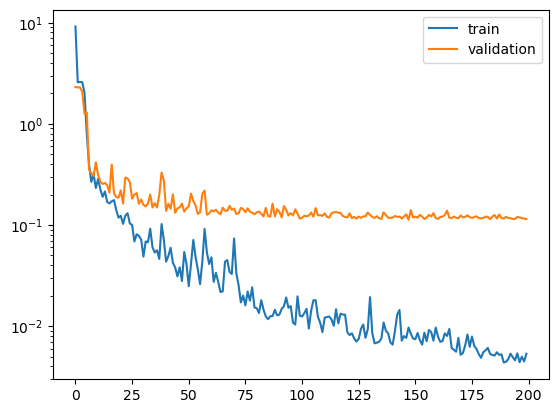

In [11]:
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

In [13]:
predicted =base_model.predict(X_test)
#inverse_data1 = min_max_scaler.inverse_transform(predicted)
#inverse_data2 = min_max_scaler.inverse_transform(Y_test)
print(predicted[1])
print(Y_test[1].reshape(1))
ERR = []
for i in range(0,len(Y_test)):
    error=(predicted[i]-Y_test[i].reshape(1))
    ERR.append(error)
ERR=np.abs(np.array(ERR))

7/7 [==============================] - 0s 2ms/step
[5.221569]
[5.]


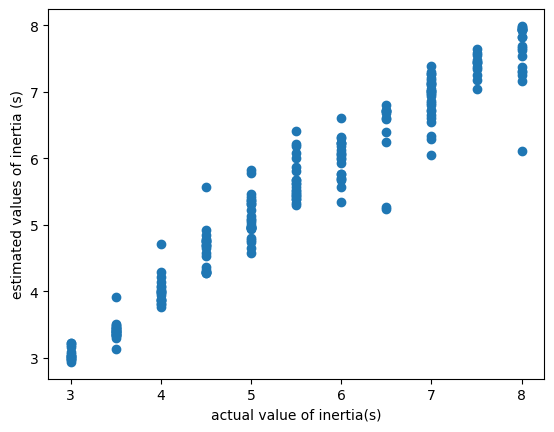

In [14]:
plt.xlabel('actual value of inertia(s)')
plt.ylabel('estimated values of inertia (s)')
plt.scatter(Y_test,predicted)
plt.savefig('Scatters_LRCN_45db.png',dpi=1000)
plt.show()

In [15]:
#print(ERR)
absvalues  = ERR.reshape(-1)
def acc(thre):
    Accuracy = np.sum(absvalues<=thre)/len(absvalues)
    return  Accuracy
print('\nTolerance=0.1: Accuracy=',  acc(0.1),
      '\nTolerance=0.2: Accuracy=',  acc(0.2),
      '\nTolerance=0.3: Accuracy=',  acc(0.3),
    '\nTolerance=0.4: Accuracy=', acc(0.4),'\nTolerance=0.5: Accuracy=',  acc(0.5))


Tolerance=0.1: Accuracy= 0.35454545454545455 
Tolerance=0.2: Accuracy= 0.5909090909090909 
Tolerance=0.3: Accuracy= 0.759090909090909 
Tolerance=0.4: Accuracy= 0.8590909090909091 
Tolerance=0.5: Accuracy= 0.9


In [21]:
r =1-(np.sum(np.square(ERR)))/np.sum(np.square(Y_test-np.mean(Y_test)))

In [22]:
r

0.9505934733937943